In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np; np.set_printoptions(precision=2); np.random.seed(0)
import torch; torch.set_printoptions(precision=2)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12)
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as pl

import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
import datetime
import pickle
import copy
import pandas as pd
import scipy
import os

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import sys
# from model import *
from functions import *


print(torch.__version__)
print(sys.version)
                
%matplotlib inline

1.13.1+cu116
3.10.8 (main, Nov 24 2022, 14:13:03) [GCC 11.2.0]


# Figure 3a-b: connectivity matrix of an example network

In [4]:
with open('/.../conn_bias_fast_switching.pickle', 'rb') as handle:
    conn_bias_across_networks = pickle.load(handle)

In [ ]:
data_fig3ab = dict.fromkeys(['w_rec', 'neuron_idx'])

for x in conn_bias_across_networks:
    if x['model'] != 'success_2023-05-10-14-28-42_wcst_57_sparsity0':    # this is the example network shown in the paper
        continue
        
    w_rec_eff = x['w_rec_eff']
    subcg_pfc_idx = x['subcg_pfc_idx']

    # plot 
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender=['rule1_pfc_esoma', 'rule2_pfc_esoma'], subcg_to_plot_receiver=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_label_converter=subcg_label_converter)
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender=['rule1_pfc_pv', 'rule2_pfc_pv'], subcg_to_plot_receiver=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_label_converter=subcg_label_converter)
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_to_plot_receiver=['rule1_pfc_esoma', 'rule2_pfc_esoma'], subcg_label_converter=subcg_label_converter)
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_to_plot_receiver=['rule1_pfc_pv', 'rule2_pfc_pv'], subcg_label_converter=subcg_label_converter)
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender = rule_subregion, subcg_to_plot_receiver=rule_subregion, subcg_label_converter=subcg_label_converter)
    fig, ax = plot_conn_subpop(weight=w_rec_eff, cg_idx=subcg_pfc_idx, subcg_to_plot_sender=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_to_plot_receiver=['mix_err_rule1_pfc_esoma', 'mix_err_rule2_pfc_esoma'], subcg_label_converter=subcg_label_converter)

    # source data
    data_fig3ab['w_rec'] = w_rec_eff
    data_fig3ab['neuron_idx'] = subcg_pfc_idx





# Figure 3d and Supplementary Figure 4: connectivity biases

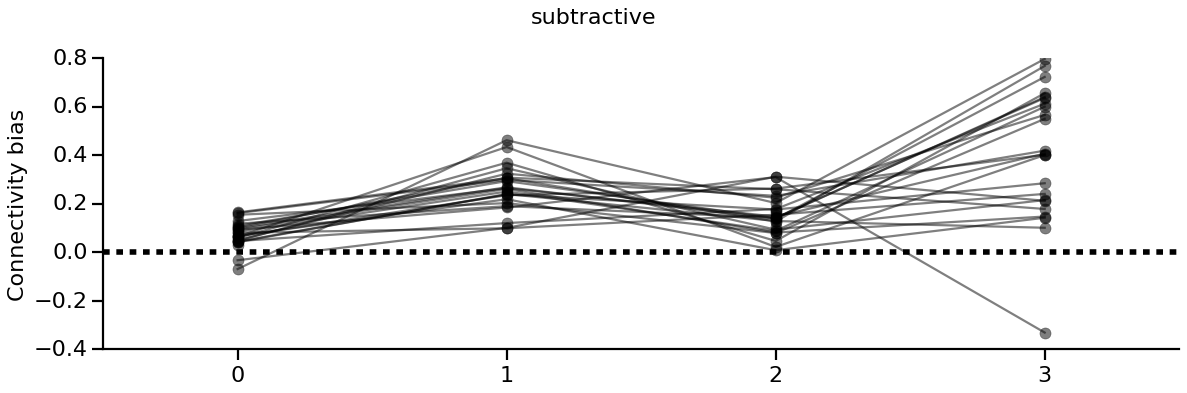

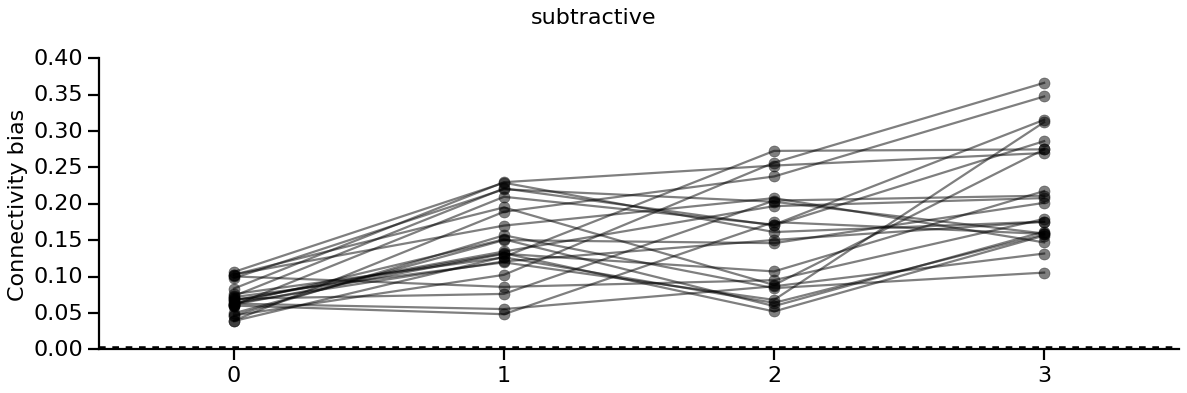

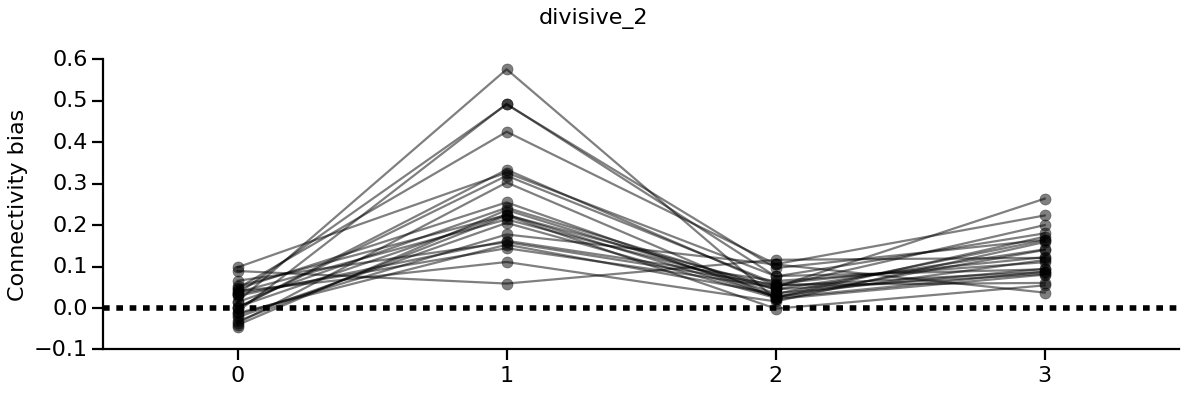

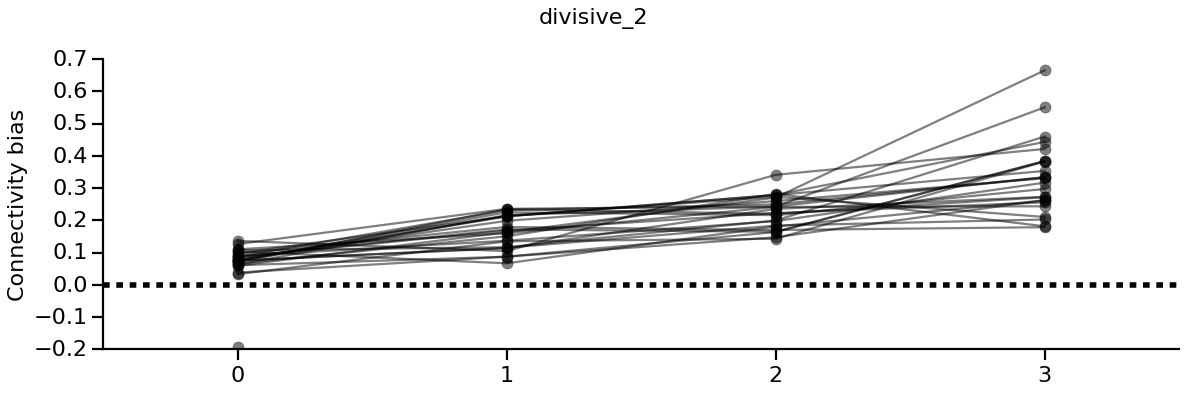

In [5]:
data_fig3d_rule_error_x_rule = {'rule_E_to_error_x_rule': [],
                                  'rule_PV_to_error_x_rule': [],
                                  'error_x_rule_to_rule_E': [],
                                  'error_x_rule_to_rule_PV': []}
data_fig3d_rule_rule = {'rule_E_to_rule_E': [],
                      'rule_PV_to_rule_PV': [],
                      'rule_PV_to_rule_E': [],
                      'rule_E_to_rule_PV': []}

data_suppfig4_rule_error_x_rule = {'rule_E_to_error_x_rule': [],
                                  'rule_PV_to_error_x_rule': [],
                                  'error_x_rule_to_rule_E': [],
                                  'error_x_rule_to_rule_PV': []}
data_suppfig4_rule_rule = {'rule_E_to_rule_E': [],
                          'rule_PV_to_rule_PV': [],
                          'rule_PV_to_rule_E': [],
                          'rule_E_to_rule_PV': []}


for dend_nonlinear in ['subtractive', 'divisive_2']:
    fig, ax = plt.subplots(figsize=[15,5])
    fig.suptitle(dend_nonlinear, fontsize=20)
    fig.patch.set_facecolor('white')
    keys_to_plot = ['bias_ruleesoma_mixerr', 'bias_rulepv_mixerr', 'bias_mixerr_ruleesoma', 'bias_mixerr_rulepv']
    for x in conn_bias_across_networks:
        data = [x[key] for key in keys_to_plot]
        if x['hp']['dend_nonlinearity'] != dend_nonlinear:
            continue
        
        if dend_nonlinear == 'subtractive':
            data_fig3d_rule_error_x_rule['rule_E_to_error_x_rule'].append(data[0])
            data_fig3d_rule_error_x_rule['rule_PV_to_error_x_rule'].append(data[1])
            data_fig3d_rule_error_x_rule['error_x_rule_to_rule_E'].append(data[2])
            data_fig3d_rule_error_x_rule['error_x_rule_to_rule_PV'].append(data[3])
        elif dend_nonlinear == 'divisive_2':
            data_suppfig4_rule_error_x_rule['rule_E_to_error_x_rule'].append(data[0])
            data_suppfig4_rule_error_x_rule['rule_PV_to_error_x_rule'].append(data[1])
            data_suppfig4_rule_error_x_rule['error_x_rule_to_rule_E'].append(data[2])
            data_suppfig4_rule_error_x_rule['error_x_rule_to_rule_PV'].append(data[3])
    
    
        
        ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
    ax.set_xticks(np.arange(len(data)))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.axhline(y=0, ls='--', color='k', linewidth=5)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylabel('Connectivity bias', fontsize=20)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()
    
    
    ## among the rule cells
    fig, ax = plt.subplots(figsize=[15,5])
    fig.suptitle(dend_nonlinear, fontsize=20)
    fig.patch.set_facecolor('white')
    keys_to_plot = ['bias_ruleesoma_ruleesoma', 'bias_ruleesoma_rulepv', 'bias_rulepv_ruleesoma', 'bias_rulepv_rulepv']
    for x in conn_bias_across_networks:
        if x['hp']['dend_nonlinearity']!=dend_nonlinear:
            continue
        data = [x[key] for key in keys_to_plot]
    
        if dend_nonlinear == 'subtractive':
            data_fig3d_rule_rule['rule_E_to_rule_E'].append(data[0])
            data_fig3d_rule_rule['rule_E_to_rule_PV'].append(data[1])
            data_fig3d_rule_rule['rule_PV_to_rule_E'].append(data[2])
            data_fig3d_rule_rule['rule_PV_to_rule_PV'].append(data[3])
        elif dend_nonlinear == 'divisive_2':
            data_suppfig4_rule_rule['rule_E_to_rule_E'].append(data[0])
            data_suppfig4_rule_rule['rule_E_to_rule_PV'].append(data[1])
            data_suppfig4_rule_rule['rule_PV_to_rule_E'].append(data[2])
            data_suppfig4_rule_rule['rule_PV_to_rule_PV'].append(data[3])

        ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
    ax.set_xticks(np.arange(len(data)))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.axhline(y=0, ls='--', color='k', linewidth=5)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylabel('Connectivity bias', fontsize=20)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()  
    


# Supplementary Figure 5: connectivity biases between E cells and SST cells

In [ ]:
data_suppfig5_divisive = {'SST_to_error_x_rule': [], 'SST_to_rule': [], 'error_x_rule_to_SST': [], 'rule_to_SST': []}
data_suppfig5_subtractive = {'SST_to_error_x_rule': [], 'SST_to_rule': [], 'error_x_rule_to_SST': [], 'rule_to_SST': []}


for dend_nonlinear in ['subtractive', 'divisive_2']:
    fig, ax = plt.subplots(figsize=[15, 5])
    fig.suptitle(dend_nonlinear, fontsize=20)
    fig.patch.set_facecolor('white')
    keys_to_plot = ['bias_rulesst_mixerr', 'bias_mixerr_rulesst']
    for x in conn_bias_across_networks:
        data = [x[key] for key in keys_to_plot]
        if x['hp']['dend_nonlinearity'] != dend_nonlinear:
            continue
        
        if dend_nonlinear == 'subtractive':
            data_suppfig5_subtractive['SST_to_error_x_rule'].append(data[0])
            data_suppfig5_subtractive['error_x_rule_to_SST'].append(data[1])
        elif dend_nonlinear == 'divisive_2':
            data_suppfig5_divisive['SST_to_error_x_rule'].append(data[0])
            data_suppfig5_divisive['error_x_rule_to_SST'].append(data[1])
        
        ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
    ax.set_xticks(np.arange(len(data)))
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.axhline(y=0, ls='--', color='k', linewidth=5)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylabel('Connectivity bias', fontsize=20)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()
    
    
    ## among the rule cells
    fig, ax = plt.subplots(figsize=[15, 5])
    fig.suptitle(dend_nonlinear, fontsize=20)
    fig.patch.set_facecolor('white')
    keys_to_plot = ['bias_rulesst_ruleedend', 'bias_ruleesoma_rulesst']
    for x in conn_bias_across_networks:
        if x['hp']['dend_nonlinearity']!=dend_nonlinear:
            continue
        data = [x[key] for key in keys_to_plot]
    
        if dend_nonlinear == 'subtractive':
            data_suppfig5_subtractive['SST_to_rule'].append(data[0])
            data_suppfig5_subtractive['rule_to_SST'].append(data[1])
        elif dend_nonlinear == 'divisive_2':
            data_suppfig5_divisive['SST_to_rule'].append(data[0])
            data_suppfig5_divisive['rule_to_SST'].append(data[1])

        ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
    ax.set_xticks(np.arange(len(data)))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.axhline(y=0, ls='--', color='k', linewidth=5)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.set_ylabel('Connectivity bias', fontsize=20)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()  
    


# Supplementary Figure 6b-c: connectivity biases for the slow-switching networks

In [8]:
with open('/.../conn_bias_slow_switching.pickle', 'rb') as handle:
    conn_bias_across_networks_slow = pickle.load(handle)

In [ ]:
data_suppfig6b_rule_error_x_rule = {'rule_E_to_error_x_rule': [],
                                  'rule_PV_to_error_x_rule': [],
                                  'error_x_rule_to_rule_E': [],
                                  'error_x_rule_to_rule_PV': []}
data_suppfig6c_rule_rule = {'rule_E_to_rule_E': [],
                          'rule_PV_to_rule_PV': [],
                          'rule_PV_to_rule_E': [],
                          'rule_E_to_rule_PV': []}


fig, ax = plt.subplots(figsize=[15,5])
fig.suptitle('Slow switching models', fontsize=20)
fig.patch.set_facecolor('white')
keys_to_plot = ['bias_ruleesoma_mixerr', 'bias_rulepv_mixerr', 'bias_mixerr_ruleesoma', 'bias_mixerr_rulepv']
for x in conn_bias_across_networks_slow:
    data = [x[key] for key in keys_to_plot]
    
    data_suppfig6b_rule_error_x_rule['rule_E_to_error_x_rule'].append(data[0])
    data_suppfig6b_rule_error_x_rule['rule_PV_to_error_x_rule'].append(data[1])
    data_suppfig6b_rule_error_x_rule['error_x_rule_to_rule_E'].append(data[2])
    data_suppfig6b_rule_error_x_rule['error_x_rule_to_rule_PV'].append(data[3])

    ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
ax.set_xticks(np.arange(len(data)))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.axhline(y=0, ls='--', color='k', linewidth=5)
ax.set_xlim(-0.5, len(data)-0.5)
ax.set_ylabel('Connectivity bias', fontsize=20)
make_pretty_axes(ax)
fig.tight_layout()
plt.show()


## among the rule cells
fig, ax = plt.subplots(figsize=[15,5])
fig.suptitle('Slow switching models', fontsize=20)
fig.patch.set_facecolor('white')
keys_to_plot = ['bias_ruleesoma_ruleesoma', 'bias_ruleesoma_rulepv', 'bias_rulepv_ruleesoma', 'bias_rulepv_rulepv']
for x in conn_bias_across_networks_slow:
    data = [x[key] for key in keys_to_plot]

    data_suppfig6c_rule_rule['rule_E_to_rule_E'].append(data[0])
    data_suppfig6c_rule_rule['rule_E_to_rule_PV'].append(data[1])
    data_suppfig6c_rule_rule['rule_PV_to_rule_E'].append(data[2])
    data_suppfig6c_rule_rule['rule_PV_to_rule_PV'].append(data[3])
    

    ax.plot(data, marker='o', color='k', linewidth=2, markersize=10, alpha=0.5)
ax.set_xticks(np.arange(len(data)))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.axhline(y=0, ls='--', color='k', linewidth=5)
ax.set_xlim(-0.5, len(data)-0.5)
ax.set_ylabel('Connectivity bias', fontsize=20)
make_pretty_axes(ax)
fig.tight_layout()
plt.show()  
    
